In [18]:
#Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from seaborn import heatmap

In [19]:
#Reading the Data File

df=pd.read_csv(r'C:\Datasets\Bike-Sharing-Dataset\day.csv')

In [20]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
639,640,2012-10-01,4,1,10,0,1,1,2,0.520833,0.512000,0.649167,0.090804,763,6015,6778
79,80,2011-03-21,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077
173,174,2011-06-23,3,0,6,0,4,1,2,0.728333,0.693833,0.703333,0.238804,746,4044,4790
10,11,2011-01-11,1,0,1,0,2,1,2,0.169091,0.191464,0.686364,0.122132,43,1220,1263
259,260,2011-09-17,3,0,9,0,6,0,2,0.491667,0.478512,0.718333,0.189675,1434,3077,4511


In [21]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [22]:
df.shape

(731, 16)

In [23]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [24]:
#Dropping  "casual" and "registered" because their sum gives us count, also instant and dteday

df.drop(['dteday','casual','registered','instant'],axis=1,inplace=True)

In [25]:
df.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801


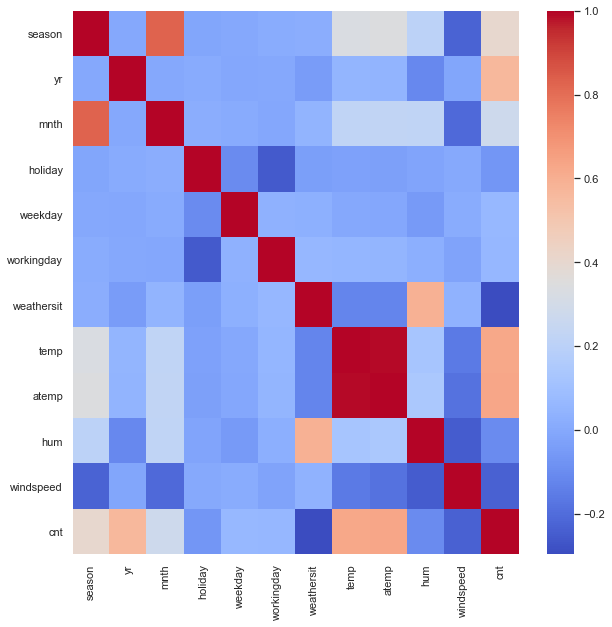

In [26]:
#Finding the correlation between all columns

corr = df.corr()

plt.figure(figsize=(10,10))
heatmap(corr, cmap='coolwarm')
plt.show()

#We find temp and atemp highly correlated hence removing one for better prediction

In [27]:


np.round(df.corr(),2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.00,-0.00,0.83,-0.01,-0.00,0.01,0.02,0.33,0.34,0.21,-0.23,0.41
yr,-0.00,1.00,-0.00,0.01,-0.01,-0.00,-0.05,0.05,0.05,-0.11,-0.01,0.57
mnth,0.83,-0.00,1.00,0.02,0.01,-0.01,0.04,0.22,0.23,0.22,-0.21,0.28
holiday,-0.01,0.01,0.02,1.00,-0.10,-0.25,-0.03,-0.03,-0.03,-0.02,0.01,-0.07
weekday,-0.00,-0.01,0.01,-0.10,1.00,0.04,0.03,-0.00,-0.01,-0.05,0.01,0.07
workingday,0.01,-0.00,-0.01,-0.25,0.04,1.00,0.06,0.05,0.05,0.02,-0.02,0.06
weathersit,0.02,-0.05,0.04,-0.03,0.03,0.06,1.00,-0.12,-0.12,0.59,0.04,-0.30
temp,0.33,0.05,0.22,-0.03,-0.00,0.05,-0.12,1.00,0.99,0.13,-0.16,0.63
atemp,0.34,0.05,0.23,-0.03,-0.01,0.05,-0.12,0.99,1.00,0.14,-0.18,0.63
hum,0.21,-0.11,0.22,-0.02,-0.05,0.02,0.59,0.13,0.14,1.00,-0.25,-0.10


In [28]:
category_names = ["season","yr","mnth","holiday","weekday","workingday","weathersit"]
numerical_values = ['temp','atemp', 'hum', 'windspeed']

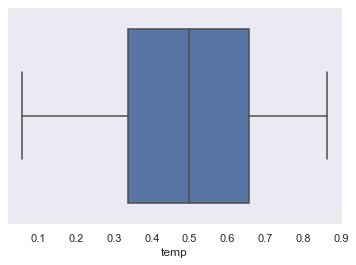

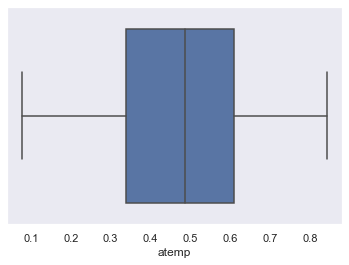

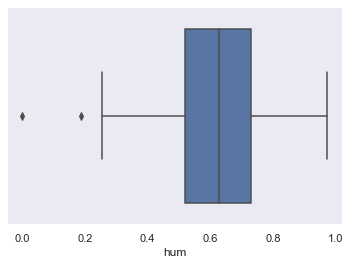

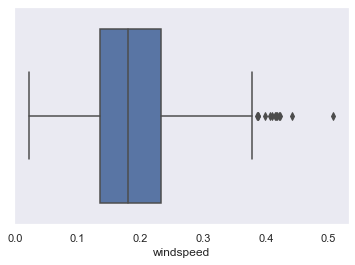

In [29]:
#Using box plot to check outliers
import seaborn as sn
for col in numerical_values:
    sn.boxplot(df[col])
    plt.show()

In [30]:
#Detecting outliers and replace their values with mean

Q1 = df[numerical_values].quantile(0.25)
Q3 = df[numerical_values].quantile(0.75)
IQR = Q3 - Q1
((df[numerical_values] < (Q1 - 1.5 * IQR)) | (df[numerical_values] > (Q3 + 1.5 * IQR))).sum()

temp          0
atemp         0
hum           2
windspeed    13
dtype: int64

In [31]:
for i in ["hum","windspeed"]:
    print(i)
    # calculate 75th and 25th percentile
    q75, q25 = np.percentile(df.loc[:,i] , [75,25])
    # calculate inter quartile range
    iqr = q75 - q25
    
    min = q25 - (iqr * 1.5)
    max = q75 + (iqr * 1.5)
    print(min)
    print(max)
    
    df.loc[df[i] < min , i] = np.nan
    df.loc[df[i] > max , i] = np.nan

hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


In [32]:
for i in ["hum","windspeed"]:
    
    df[i] = df[i].fillna(df[i].mean())

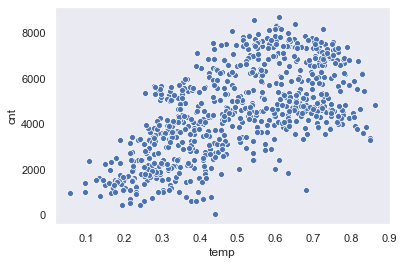

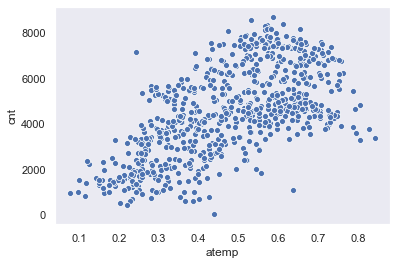

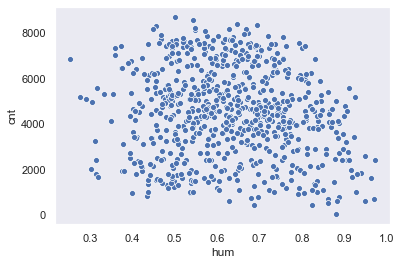

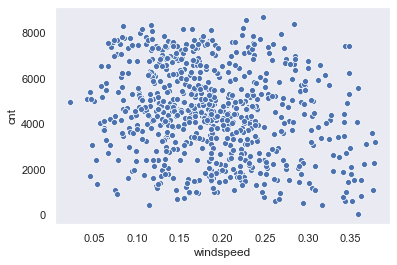

In [33]:
# scatter plots of continuous variables vs cnt
for col in numerical_values:
    sn.scatterplot(x = col, y = 'cnt' , data = df)
    plt.show()

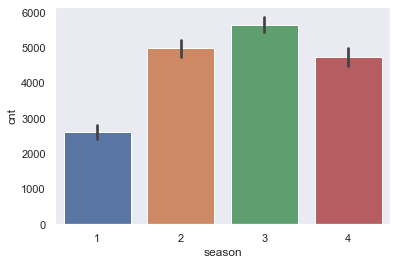

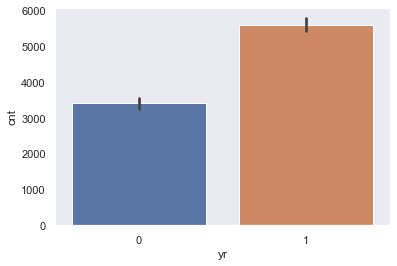

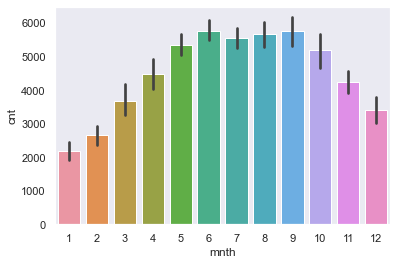

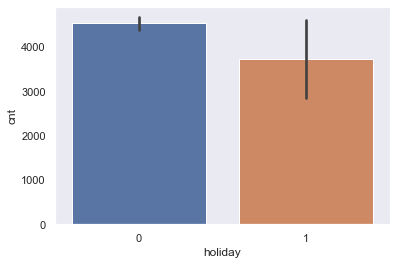

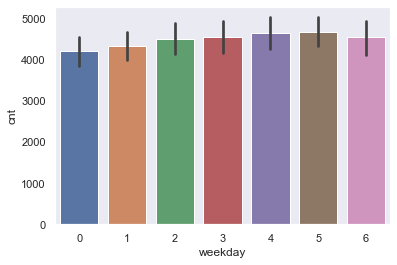

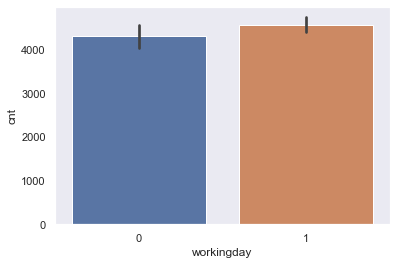

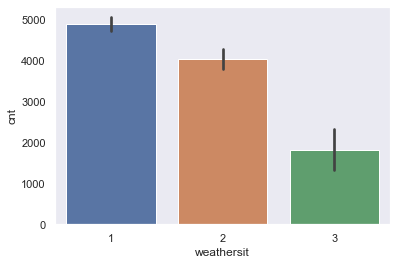

In [34]:
#Additional Information from our Dataset
for category in category_names:
    sn.set(style = "dark")
    sn.barplot(x = category, y = 'cnt' , data = df)
    plt.show()

In [42]:
#Training the Model
#Removing atemp for better prediction

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=df.drop(['cnt','atemp'],axis='columns')
Y=df['cnt']

In [43]:
X.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539


In [44]:
Y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [46]:
#Using Linear Regression

model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [47]:
model.score(X_test,y_test)

0.8043742740533973

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,Y,cv=cv)

array([0.80437427, 0.77978733, 0.8193191 , 0.75474233, 0.77336203])

In [49]:
#XGBoost Regressor

import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE


xgb_r = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
  
# Fitting the model 
xgb_r.fit(X_train,y_train) 
  
# Predict the model 
pred = xgb_r.predict(X_test) 
  
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, pred)) 
print("RMSE : % f" %(rmse)) 

[21:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[21:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  702.816412


In [50]:
xgb_r.score(X_test,y_test)

0.8838621392266696

In [51]:
cv= ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(xg.XGBRegressor(),X,Y,cv=cv)

array([0.89739952, 0.85787748, 0.88776788, 0.87085721, 0.8380092 ])

In [52]:
#Decsion tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10,random_state = 0)  
  
# fit the 
#regressor.fit(X_train , y_train) 

In [56]:
regressor.fit(X_train , y_train) 
regressor.score(X_test,y_test)

0.7527528266649871

In [57]:
regressor.fit(X_train , y_train) 
print("R-Squared on train dataset={}".format(regressor.score(X_test,y_test)))

regressor.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(regressor.score(X_test,y_test)))

R-Squared on train dataset=0.7527528266649871
R-Squared on test dataset=0.8611201748939108


In [58]:
#Using GridSearchCV to get best parameters for our model
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }



grid_cv_regressor = GridSearchCV(regressor, param_grid, cv=5)

grid_cv_regressor.fit(X,Y)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=4, max_leaf_nodes=10,
                                             min_samples_split=5,
                                             random_state=0),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40]})

In [59]:
print("R-Squared::{}".format(grid_cv_regressor.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_regressor.best_params_))

R-Squared::0.060082373329141146
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}
